# LogReg WOW 0.3 vs Miranda Attributes

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os, random, time, MirandaAttributes, cv2
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
#Miranda old dataset
#train_dataset_url = "https://raw.githubusercontent.com/intentodemusico/Stegonomono/master/ANN/Dataset/train_70000.csv"
#test_dataset_url = "https://raw.githubusercontent.com/intentodemusico/Stegonomono/master/ANN/Dataset/test_70000.csv"

#Miranda dataset
train_dataset_url = "https://raw.githubusercontent.com/intentodemusico/Stegonomono/master/ANN/NewDataset/Final/train_5000.csv"
test_dataset_url = "https://raw.githubusercontent.com/intentodemusico/Stegonomono/master/ANN/NewDataset/Final/test_5000.csv"

TensorFlow version: 2.3.0
Eager execution: True


In [3]:
#%% Importing the dataset
MirandaLabels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Geometric_Mean', 'Mobility', 'Complexity','IsStego','Location']
trainDataset = pd.read_csv(train_dataset_url,header=None,names=MirandaLabels)
MirandaX_train = trainDataset.iloc[:, :-2].values
MirandaY_train = trainDataset.iloc[:, -2].values

testDataset = pd.read_csv(test_dataset_url,header=None,names=MirandaLabels)
MirandaX_test = testDataset.iloc[:, :-2].values
MirandaY_test = testDataset.iloc[:, -2].values
MirandaLabels=MirandaLabels[:-2]

import pandas as pd

#%% Importing the dataset
labels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Geometric_Mean', 'Mobility', 'Complexity','IsStego','Location']
trainDataset = pd.read_csv(train_dataset_url,header=None,names=labels)
X_Train = trainDataset.iloc[:, :-2].values
Y_Train = trainDataset.iloc[:, -2].values

testDataset = pd.read_csv(test_dataset_url,header=None,names=labels)
X_Test = testDataset.iloc[:, :-2].values
Y_Test = testDataset.iloc[:, -2].values

In [4]:
#%% Feature Scaling
from sklearn.preprocessing import StandardScaler

## Getting x and y

In [5]:
isStego=lambda x:1 if x[:6]=="stego_" else 0
getYFromImageList=lambda x: [isStego(element) for element in x]
folder="../../../Dataset/Mono/MonoSamples/WOW_5" 
images=os.listdir(folder)
random.shuffle(images)
images=images
print(len(images))

40000


In [6]:
Garciay=getYFromImageList(images)
windowSize=128
GarciaLabels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Garcia_Gmean', 'Epsilon_Gmean', 'Mobility', 'Complexity']
t = time.time()

GarciaX=pd.DataFrame(([ MirandaAttributes.attributes( cv2.imread( os.path.abspath(os.path.join(folder, images[i])) 
                                        ) ,windowSize,True)  for i in range(len(images))] ),columns=GarciaLabels)
elapsed = time.time() - t
print(elapsed)
GarciaX_train, GarciaX_test, GarciaY_train, GarciaY_test = train_test_split(GarciaX, Garciay, test_size=0.2, 
                                                                            random_state=0)

51.78690433502197


### EDA

In [7]:
pd.DataFrame(GarciaY_train).describe()

,0
count,32000.000000
mean,0.500656
std,0.500007
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
pd.DataFrame(GarciaY_train).value_counts()

1    16021
0    15979
dtype: int64

In [9]:
GarciaX_train

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
21370,2.369422,0.273567,43.271130,203.0,64.0,43.700058,40.081173,0.295669,5.581399
2470,1.896968,0.327995,36.600674,151.0,57.5,51.553642,52.966080,0.370922,4.547978
13767,33.678978,5.042560,164.613281,1474.0,12.5,27.409678,10.070005,0.410245,3.494751
13316,13.748859,3.174319,144.465118,923.0,4.0,13.148595,9.193387,0.399777,3.630086
26374,31.695534,5.099374,175.024948,1353.0,4.0,10.591258,11.203708,0.294010,2.707718
...,...,...,...,...,...,...,...,...,...
20757,3.298422,0.231853,44.645828,264.0,70.0,35.763664,36.441921,0.350606,3.866583
32103,8.814417,2.525034,58.016296,300.0,45.0,49.774136,50.991344,0.225248,6.882358
30403,1.847075,-0.171205,42.785530,154.0,72.0,51.275642,33.855595,0.248697,6.801694
21243,3.321295,0.911499,46.502102,210.0,51.0,45.084412,46.780285,0.287324,5.460868


In [10]:
GarciaX_train.describe()

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,23.641564,2.909845,108.094557,843.632844,32.509625,53.000911,26.546891,0.323901,5.893594
std,48.323836,3.224175,96.650518,1519.309772,20.951438,467.269346,14.601687,0.213851,3.021306
min,1.224067,-1.219257,15.969453,90.000000,0.000000,1.776100,1.038634,0.086105,0.907459
25%,3.177516,1.027240,58.591243,249.750000,14.000000,27.548245,14.553534,0.186125,3.535960
50%,6.345994,1.881191,81.179634,392.000000,33.000000,37.333225,25.404307,0.253764,5.599429
75%,16.633764,3.398783,119.835543,736.000000,49.500000,46.439072,37.573871,0.375864,7.944907
max,254.003906,15.906097,1021.998047,16384.000000,86.500000,16384.000000,63.271149,1.419760,16.286221


##### Dataset looks homogeneous

In [11]:
trainDataset.iloc[:,:-2]

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility,Complexity
0,13.528070,3.428313,346.67215,2474.0,156.0,153.809620,0.313289,4.691166
1,14.178134,3.462216,348.01108,2676.0,156.5,153.171980,0.352946,4.587785
2,2.679554,1.893911,299.19614,1384.0,139.5,155.424900,0.114664,10.567497
3,2.924293,1.936686,301.38376,1475.0,130.5,154.805740,0.227066,7.881114
4,4.072080,2.250892,461.31750,1938.0,50.0,46.029896,0.072598,13.123314
...,...,...,...,...,...,...,...,...
3995,24.946789,4.806365,529.44110,3886.0,127.5,89.651695,0.958232,2.059683
3996,16.434111,2.890011,216.15149,2006.0,186.5,191.664670,0.218244,4.615892
3997,11.568215,2.730022,267.74970,2194.0,196.5,164.909880,0.932509,2.087991
3998,10.807127,2.911698,165.19333,1083.0,237.5,221.035020,0.149275,7.495107


In [12]:
trainDataset.iloc[:,:-2].describe()

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility,Complexity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,21.823689,3.123951,380.995970,2977.834250,148.57975,123.201477,0.434912,5.905692
std,44.873113,3.051797,284.810485,4178.229483,72.19171,58.813579,0.297597,4.607042
min,-1.643958,-0.924079,72.596810,356.000000,1.00000,1.206894,0.056714,0.909949
25%,1.143461,1.268119,218.918723,1048.000000,94.50000,76.802810,0.170817,2.576243
50%,5.159363,2.156878,299.593935,1701.000000,156.50000,126.712212,0.360225,4.435914
75%,17.597058,3.684183,437.186158,2928.500000,204.00000,170.701695,0.695353,7.900007
max,250.701118,15.891788,2931.856400,47059.000000,342.50000,246.732220,1.394352,26.708015


#### Standard scalling

In [13]:
scG=StandardScaler()
sc_GarciaX_train=pd.DataFrame(scG.fit_transform(GarciaX_train),columns=GarciaLabels)
sc_GarciaX_test=pd.DataFrame(scG.transform(GarciaX_test),columns=GarciaLabels)

scM=StandardScaler()
sc_MirandaX_train=pd.DataFrame(scM.fit_transform(MirandaX_train),columns=MirandaLabels)
sc_MirandaX_test=pd.DataFrame(scM.transform(MirandaX_test),columns=MirandaLabels)

#### Recursive Feature Elimination

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logregRFEG = LogisticRegression()
rfe = RFE(logregRFEG, n_features_to_select=1)
rfe = rfe.fit(sc_GarciaX_train,GarciaY_train)
print(rfe.ranking_)
print("García's Dataset")
print("Ordered from most to less desired variables:")
desiredVariables=GarciaLabels
sortOrder=rfe.ranking_
sorted(desiredVariables,key=lambda pos: sortOrder[desiredVariables.index(pos)])

[2 4 3 1 9 7 8 6 5]
García's Dataset
Ordered from most to less desired variables:


['Range',
 'Kurtosis',
 'Std',
 'Skewness',
 'Complexity',
 'Mobility',
 'Garcia_Gmean',
 'Epsilon_Gmean',
 'Median']

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logregRFEM = LogisticRegression()
rfe = RFE(logregRFEM, n_features_to_select=1)
rfe = rfe.fit(sc_MirandaX_train,MirandaY_train)
print(rfe.ranking_)
print("Miranda's Dataset")
print("Ordered from most to less desired variables:")
desiredVariables=MirandaLabels
sortOrder=rfe.ranking_
sorted(desiredVariables,key=lambda pos: sortOrder[desiredVariables.index(pos)])

[6 2 4 3 8 7 1 5]
Miranda's Dataset
Ordered from most to less desired variables:


['Mobility',
 'Skewness',
 'Range',
 'Std',
 'Complexity',
 'Kurtosis',
 'Geometric_Mean',
 'Median']

RFE Shows prefferences for the variables to be predictors, meaning it to be ordered depending on de predictor-likability of a variable. Proving the anterior analysis, 

### Modelling

In [16]:
import statsmodels.api as sm
logit_model=sm.Logit(MirandaY_train,sc_MirandaX_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.337155
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.514    
Dependent Variable: y                AIC:              2713.2422
Date:               2021-09-01 00:32 BIC:              2763.5946
No. Observations:   4000             Log-Likelihood:   -1348.6  
Df Model:           7                LL-Null:          -2772.6  
Df Residuals:       3992             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Kurtosis          0.7366   0.2630  2.8009 0.0051  0.2211  1.2520
Skewness         -2.2568   0.2593 -8.7019 0.0000 -2.7651 -1.7485
Std          

In [17]:
sc_GarciaX_train

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
0,-0.440207,-0.817673,-0.670710,-0.421667,1.503041,-0.019905,0.926913,-0.132019,-0.103333
1,-0.449984,-0.800791,-0.739727,-0.455894,1.192795,-0.003097,1.809353,0.219882,-0.445382
2,0.207715,0.661487,0.584783,0.414910,-0.955063,-0.054768,-1.128441,0.403765,-0.793988
3,-0.204720,0.082030,0.376316,0.052240,-1.360769,-0.085289,-1.188477,0.354812,-0.749194
4,0.166669,0.679108,0.692510,0.335267,-1.360769,-0.090762,-1.050798,-0.139775,-1.054486
...,...,...,...,...,...,...,...,...,...
31995,-0.420982,-0.830610,-0.656486,-0.381517,1.789422,-0.036890,0.677674,0.124879,-0.670916
31996,-0.306834,-0.119354,-0.518146,-0.357821,0.596168,-0.006906,1.674110,-0.461325,0.327269
31997,-0.451016,-0.955624,-0.675734,-0.453919,1.884882,-0.003692,0.500546,-0.351668,0.300570
31998,-0.420509,-0.619810,-0.637280,-0.417060,0.882549,-0.016942,1.385710,-0.171042,-0.143227


In [18]:
import statsmodels.api as sm
logit_modelG=sm.Logit(GarciaY_train,sc_GarciaX_train)
result=logit_modelG.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.692811
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: y                AIC:              44357.8806
Date:               2021-09-01 00:32 BIC:              44433.2420
No. Observations:   32000            Log-Likelihood:   -22170.   
Df Model:           8                LL-Null:          -22181.   
Df Residuals:       31991            LLR p-value:      0.0059673 
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Kurtosis           0.1246   0.0748  1.6664 0.0956 -0.0219  0.2711
Skewness          -0.0878   0.0669 -1.3130 0.1892 -0.2189  0.0433


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(newX), y, test_size=0.2, random_state=0)
logregMiranda = LogisticRegression()
logregMiranda.fit(sc_MirandaX_train, MirandaY_train)
y_predMiranda = logregMiranda.predict(sc_MirandaX_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregMiranda.score(sc_MirandaX_test, MirandaY_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [20]:
print(cy_predMiranda == MirandaY_test)

[ True False False  True False  True  True False False  True  True False
  True False  True False  True False  True  True  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False False  True  True False False  True
 False  True  True False  True False  True False  True False  True False
  True False  True False  True  True  True  True  True False  True False
  True False  True False  True False  True False  True False  True False
  True  True  True False  True False  True False  True  True  True False
  True False False False  True False  True False  True False  True  True
  True False  True False  True False  True False  True False  True False
  True False  True False  True  True False  True  True False  True False
  True False  True False  True False  True False  True False  True  True
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  T

In [23]:
logregGarcia = LogisticRegression()
logregGarcia.fit(sc_GarciaX_train, GarciaY_train)
y_predGarcia = logregGarcia.predict(sc_GarciaX_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregGarcia.score(sc_GarciaX_test, GarciaY_test)))

Accuracy of logistic regression classifier on test set: 0.50


In [24]:
print(y_predGarcia == GarciaY_test)

[False  True False ... False False  True]


In [ ]:
len(y_predMiranda)

1000

In [38]:
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
import copy
def best_subset_cv(estimator, X, Y, labels,cv=3):
    n_features = X.shape[1]
    subsets = chain.from_iterable([combinations(labels, k + 1) for k in range(n_features)])
    best_score = -np.inf
    best_subset = None
    for subset in subsets:
        estimatorCopy=copy.copy(estimator)
        score = cross_val_score(estimatorCopy, X.loc[:, list(subset)], Y, cv=cv).mean()
        if score > best_score:
            best_score, best_subset = score, subset

    return best_subset, best_score

In [39]:
logregBSM = LogisticRegression()
subM, scoM=best_subset_cv(logregBSM,sc_MirandaX_train,MirandaY_train,MirandaLabels)
print("Miranda")

Miranda


In [40]:
subM, scoM

(('Skewness', 'Std', 'Range', 'Mobility'), 0.8358009667334375)

In [41]:
logregBSG = LogisticRegression()
subG, scoG=best_subset_cv(logregBSG,sc_GarciaX_train,GarciaY_train,GarciaLabels)
print("García")

García


In [42]:
subG, scoG

(('Std', 'Range', 'Garcia_Gmean', 'Epsilon_Gmean', 'Mobility'),
 0.5076251220890206)

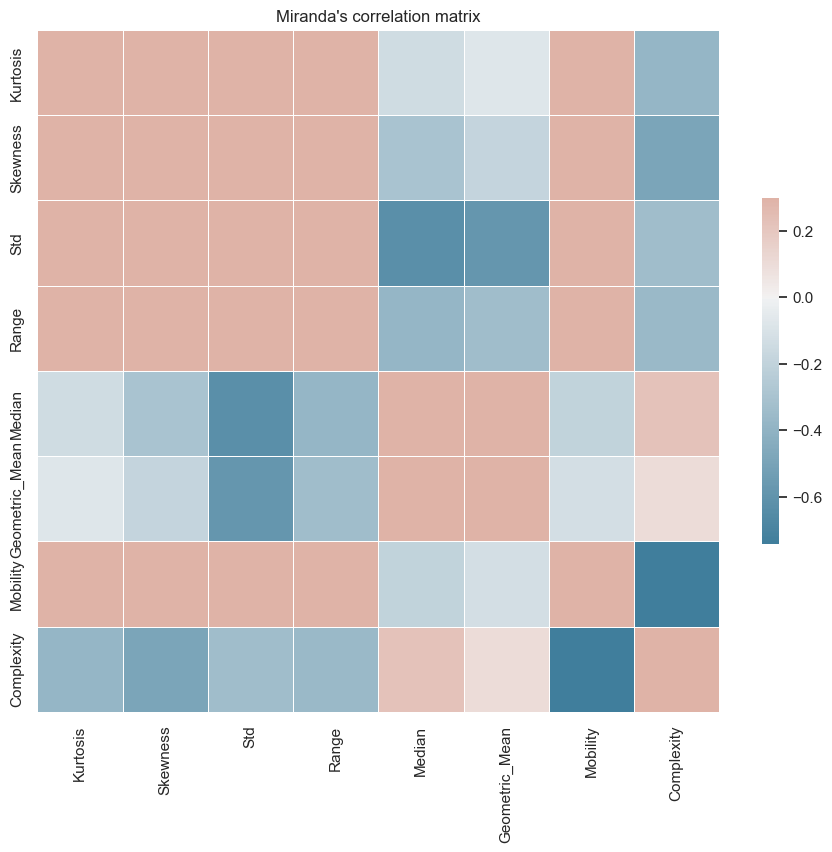

In [43]:
import seaborn as sns
sns.set_theme(style="dark")
corr = sc_MirandaX_train.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Miranda's correlation matrix")
plt.show()

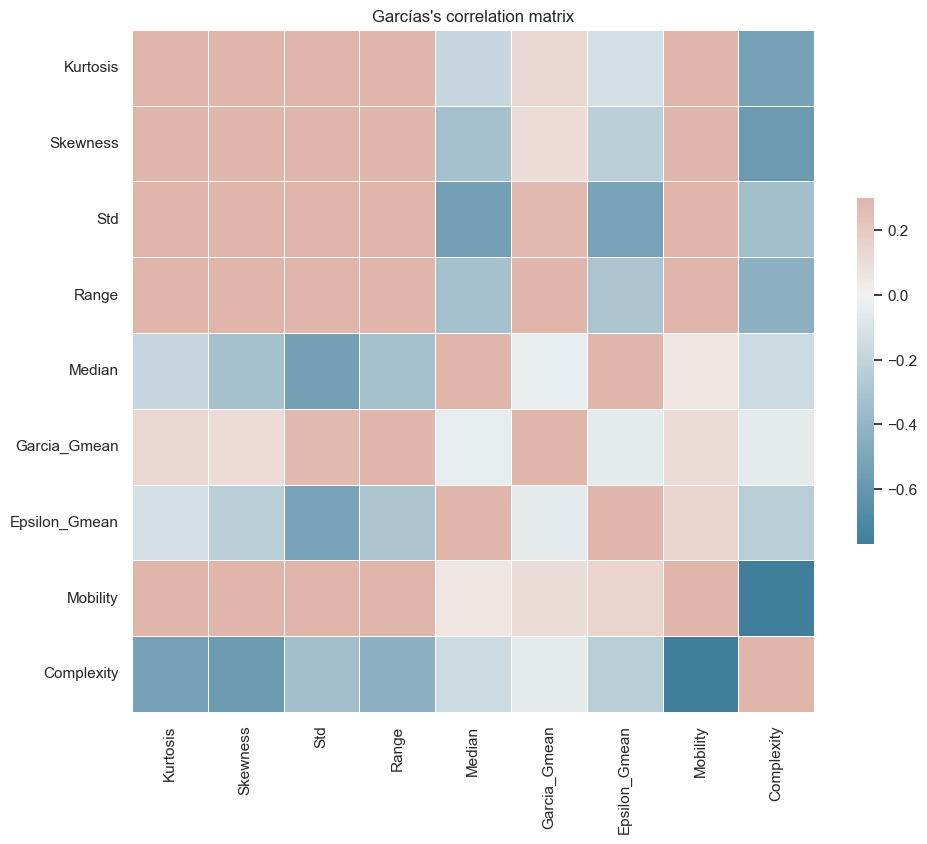

In [44]:
sns.set_theme(style="dark")
corr = sc_GarciaX_train.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Garcías's correlation matrix")
plt.show()

from sklearn import metrics

y_pred = (model.predict(X_Test) > 0.5)
#%% Making the Confusion Matrix
cm = metrics.confusion_matrix(Y_Test, y_pred)
print("Confusion matrix\n",cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity :', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity :', specificity)
#%% 
print("Precision",metrics.precision_score(Y_Test, y_pred, average=None))
print("Accuracy",metrics.accuracy_score(Y_Test, y_pred))
print("F1",metrics.f1_score(Y_Test, y_pred, average=None))

import numpy as np


fallas=np.array(labels,dtype='<U256')
y_pred=y_pred.reshape(len(y_pred))
print(np.shape(y_pred))
print(np.shape(Y_Test))
for i in range(len(y_pred)):
    if(y_pred[i]!=Y_Test[i]>0.5):
        fallas=np.vstack((fallas,testDataset.iloc[i].to_numpy()))

y_pred = (model.predict(X_Train) > 0.5).reshape(len(X_Train))
for i in range(len(y_pred)):
    if(y_pred[i]!=Y_Train[i]>0.5):
        fallas=np.vstack((fallas,trainDataset.iloc[i].to_numpy()))

asd="fallasEval.csv"
print("Fallas",len(fallas))
np.savetxt(asd,fallas,delimiter=",", fmt="%s")

from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'


In [ ]:
logreg.get_params()

In [ ]:
dir(logreg)